<a href="https://colab.research.google.com/github/himanshudas13/StreamflowPrediction/blob/main/streamCORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

numberninja13_2015_nethravathi_data_path = kagglehub.dataset_download('numberninja13/2015-nethravathi-data')
numberninja13_ann_lag_model_keras_default_1_path = kagglehub.model_download('numberninja13/ann-lag-model/Keras/default/1')

print('Data source import complete.')


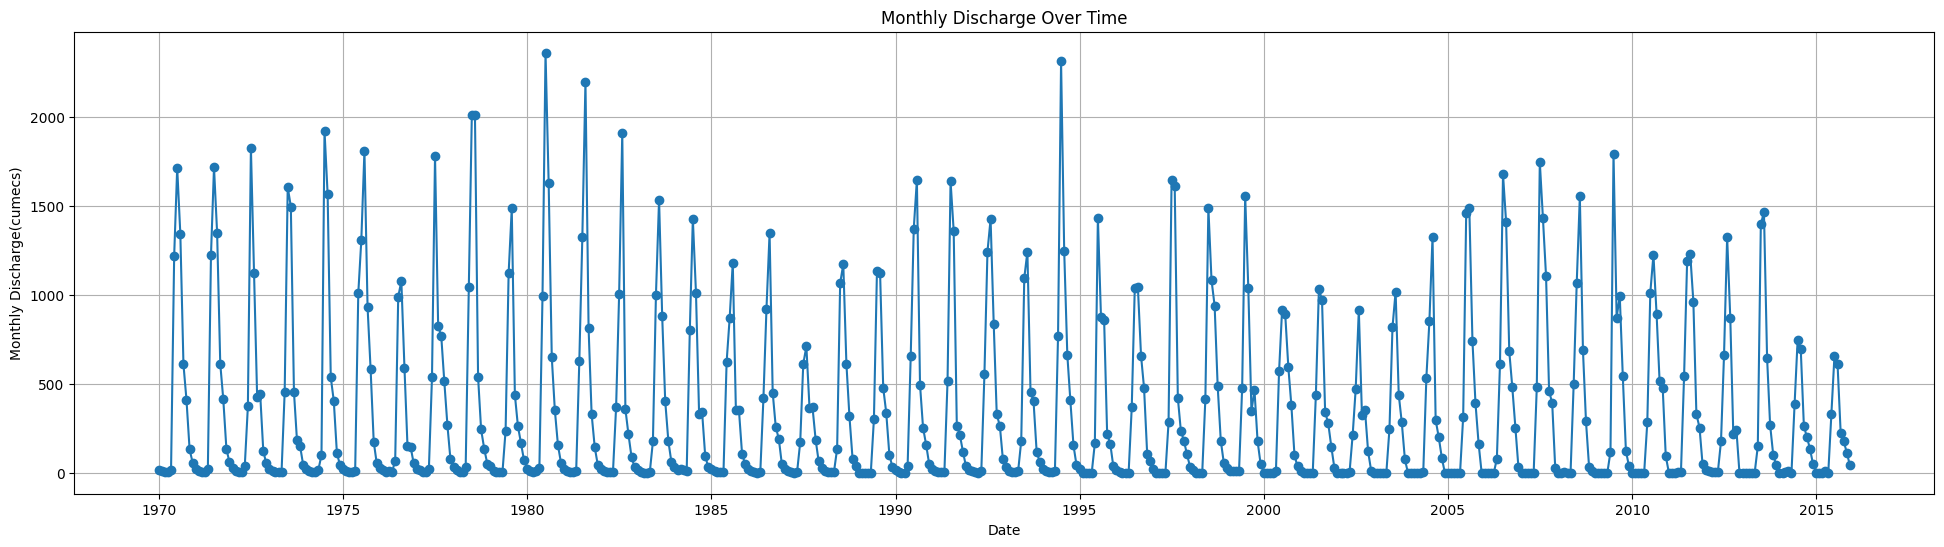

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/kaggle/input/2015-nethravathi-data/Nethravathi Dataset-2015.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)
data.sort_values('Date', inplace=True)

# Plot
plt.figure(figsize=(24, 6))
plt.plot(data['Date'], data['Streamflow (m3/s)'], marker='o', linestyle='-')
plt.title('Monthly Discharge Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Discharge(cumecs)')
plt.grid()
plt.show()

output_path = '/kaggle/working/streamflow_plot_monthly.png'
plt.savefig(output_path)

In [ ]:
print(list(data.columns))
df=data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
print(list(df.columns))

['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)']
['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)', 'Month']


In [ ]:
lags = [1, 2, 3, 4, 5, 6]
for lag in lags:
    df[f'Rainfall_lag{lag}'] = df['Rainfall (mm)'].shift(lag)
    df[f'Tmax_lag{lag}'] = df['Tmax_avg (oC)'].shift(lag)
    df[f'Tmin_lag{lag}'] = df['Tmin_avg (oC)'].shift(lag)

df = df.dropna()
print(list(df.columns))

['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)', 'Month', 'Rainfall_lag1', 'Tmax_lag1', 'Tmin_lag1', 'Rainfall_lag2', 'Tmax_lag2', 'Tmin_lag2', 'Rainfall_lag3', 'Tmax_lag3', 'Tmin_lag3', 'Rainfall_lag4', 'Tmax_lag4', 'Tmin_lag4', 'Rainfall_lag5', 'Tmax_lag5', 'Tmin_lag5', 'Rainfall_lag6', 'Tmax_lag6', 'Tmin_lag6']


In [ ]:
corr_matrix = df.corr()

# View correlation of Streamflow with all other variables
streamflow_corr = corr_matrix['Streamflow (m3/s)']

# Display results
# print("Correlation Matrix:\n", corr_matrix)
print("\nStreamflow Correlations:\n", streamflow_corr)



Streamflow Correlations:
 Date                -0.064975
Rainfall (mm)        0.836477
Tmax_avg (oC)       -0.819190
Tmin_avg (oC)        0.301088
T_mean (oC)         -0.457787
Streamflow (m3/s)    1.000000
Month                0.277317
Rainfall_lag1        0.860209
Tmax_lag1           -0.621611
Tmin_lag1            0.436719
Rainfall_lag2        0.405179
Tmax_lag2           -0.109625
Tmin_lag2            0.590958
Rainfall_lag3       -0.023827
Tmax_lag3            0.417567
Tmin_lag3            0.598869
Rainfall_lag4       -0.257259
Tmax_lag4            0.651440
Tmin_lag4            0.303031
Rainfall_lag5       -0.400408
Tmax_lag5            0.614773
Tmin_lag5           -0.201646
Rainfall_lag6       -0.461090
Tmax_lag6            0.433182
Tmin_lag6           -0.655523
Name: Streamflow (m3/s), dtype: float64


In [ ]:
sorted_corr = streamflow_corr.sort_values(ascending=False)
print(sorted_corr)

Streamflow (m3/s)    1.000000
Rainfall_lag1        0.860209
Rainfall (mm)        0.836477
Tmax_lag4            0.651440
Tmax_lag5            0.614773
Tmin_lag3            0.598869
Tmin_lag2            0.590958
Tmin_lag1            0.436719
Tmax_lag6            0.433182
Tmax_lag3            0.417567
Rainfall_lag2        0.405179
Tmin_lag4            0.303031
Tmin_avg (oC)        0.301088
Month                0.277317
Rainfall_lag3       -0.023827
Date                -0.064975
Tmax_lag2           -0.109625
Tmin_lag5           -0.201646
Rainfall_lag4       -0.257259
Rainfall_lag5       -0.400408
T_mean (oC)         -0.457787
Rainfall_lag6       -0.461090
Tmax_lag1           -0.621611
Tmin_lag6           -0.655523
Tmax_avg (oC)       -0.819190
Name: Streamflow (m3/s), dtype: float64


In [ ]:
relevant_features = streamflow_corr[abs(streamflow_corr) >= 0.6].index

# Create a new DataFrame with only the relevant features
df_new = df[relevant_features]

# Display the filtered DataFrame
print("Filtered DataFrame with Relevant Features:")
print(df_new)

Filtered DataFrame with Relevant Features:
     Rainfall (mm)  Tmax_avg (oC)  Streamflow (m3/s)  Rainfall_lag1  \
6          1357.37      25.916129        1715.358065         840.85   
7           864.18      25.470968        1345.029032        1357.37   
8           284.08      26.923333         610.036667         864.18   
9           206.85      28.432258         410.074193         284.08   
10           10.00      29.856667         130.830000         206.85   
..             ...            ...                ...            ...   
547         943.00      28.164516         609.264100        1247.99   
548         456.08      29.253333         223.141800         943.00   
549         298.83      30.558065         176.047000         456.08   
550          99.03      30.013333         113.434000         298.83   
551          20.81      31.519355          41.392710          99.03   

     Tmax_lag1  Tmax_lag4  Tmax_lag5  Tmin_lag6  
6    26.950000  31.916129  31.025000  17.303226  
7   

In [ ]:
features_to_drop = ['Tmax_lag4' , 'Tmax_lag5' , 'Tmin_lag6'  ]  # Replace with the actual feature names

# Drop the specified features from the DataFrame
df_new = df_new.drop(columns=features_to_drop)

# Display the updated DataFrame
print("Updated DataFrame after dropping specified features:")
print(df_new)

Updated DataFrame after dropping specified features:
     Rainfall (mm)  Tmax_avg (oC)  Streamflow (m3/s)  Rainfall_lag1  Tmax_lag1
6          1357.37      25.916129        1715.358065         840.85  26.950000
7           864.18      25.470968        1345.029032        1357.37  25.916129
8           284.08      26.923333         610.036667         864.18  25.470968
9           206.85      28.432258         410.074193         284.08  26.923333
10           10.00      29.856667         130.830000         206.85  28.432258
..             ...            ...                ...            ...        ...
547         943.00      28.164516         609.264100        1247.99  27.835484
548         456.08      29.253333         223.141800         943.00  28.164516
549         298.83      30.558065         176.047000         456.08  29.253333
550          99.03      30.013333         113.434000         298.83  30.558065
551          20.81      31.519355          41.392710          99.03  30.013333

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


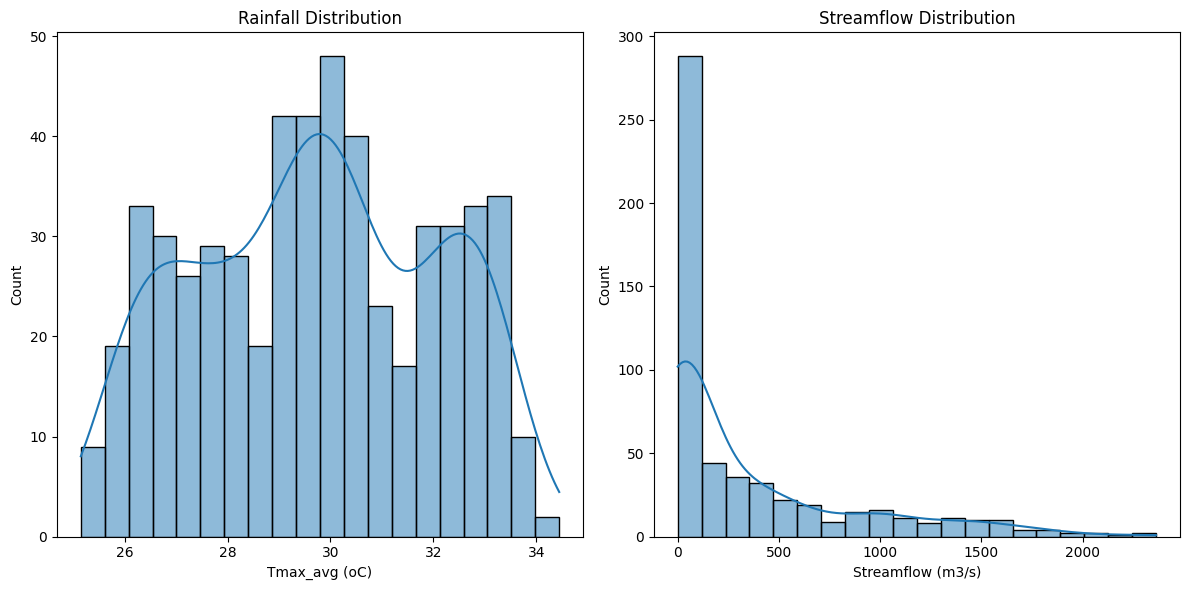

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram for Rainfall and Streamflow
plt.figure(figsize=(12, 6))

# Rainfall distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Tmax_avg (oC)'], kde=True, bins=20)
plt.title('Rainfall Distribution')

# Streamflow distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Streamflow (m3/s)'], kde=True, bins=20)
plt.title('Streamflow Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# features = df[['Rainfall (mm)', 'Tmax_avg (oC)', 'Rainfall_lag1' ,'Tmax_lag1']].values
# target = df['Streamflow (m3/s)'].values.reshape(-1, 1)
# dates=df['Date'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Separate the features into different categories
rainfall_features = df[['Rainfall (mm)', 'Rainfall_lag1']].values
temp_features = df[['Tmax_avg (oC)', 'Tmax_lag1']].values
streamflow_features= df[['Streamflow (m3/s)']].values

# Initialize the scalers
scaler_temp = StandardScaler()  # For temperature features
scaler_rainfall = MinMaxScaler()  # For rainfall features (or log-transform if you prefer)
scaler_streamflow = MinMaxScaler()

# Scale the features
scaled_temp = scaler_temp.fit_transform(temp_features)
scaled_rainfall = scaler_rainfall.fit_transform(rainfall_features)
target_scaled=scaler_streamflow.fit_transform(streamflow_features)

# Combine the scaled features back together
features_scaled = np.hstack([scaled_rainfall, scaled_temp])

# Get the target and dates
target_scaled =target_scaled.reshape(-1, 1)
dates = df['Date'].values

# Now `scaled_features` contains your scaled input data, ready for modeling
print(features_scaled[:5])  # Preview the first few rows of scaled features
print(target_scaled[:5])

[[ 0.84728655  0.5248686  -1.63988877 -1.1879093 ]
 [ 0.53943147  0.84728655 -1.83256759 -1.63507228]
 [ 0.17732613  0.53943147 -1.20394131 -1.82761047]
 [ 0.12911824  0.17732613 -0.55083458 -1.19944299]
 [ 0.00624212  0.12911824  0.0656911  -0.54681294]]
[[0.72589809]
 [0.56918379]
 [0.25815278]
 [0.17353349]
 [0.0553641 ]]


In [ ]:
# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler

# scaler_features = MinMaxScaler(feature_range=(0, 1))
# scaler_target = MinMaxScaler(feature_range=(0, 1))

# features_scaled = scaler_features.fit_transform(features)
# target_scaled = scaler_target.fit_transform(target)




In [ ]:
train_size = int(len(target_scaled) * 0.8)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]
date_train, date_test = dates[:train_size], dates[train_size:]

In [ ]:
date_train.size

436

In [ ]:
import tensorflow as tf
from keras_tuner import Hyperband

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Add hidden layers with adjustable units and activation
    for i in range(hp.Int("num_layers", 1, 5)):  # Number of layers
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
                activation=hp.Choice("activation", ["relu", "tanh","linear"])
            )
        )

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation="relu"))

    # Compile model with adjustable optimizer and learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
        ),
        loss="mse",
        metrics=["mae"]
    )
    return model


In [ ]:
# Initialize Keras Tuner
tuner = Hyperband(
    build_model,
    objective="val_loss",
    max_epochs=50,
    factor=3,
    directory="hyperparam_tuning",
    project_name="streamflow_prediction"
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")


Trial 90 Complete [00h 00m 07s]
val_loss: 0.0048746708780527115

Best val_loss So Far: 0.003674516687169671
Total elapsed time: 00h 05m 25s
Best Hyperparameters:
num_layers: 5
units_0: 16
activation: relu
learning_rate: 0.01
units_1: 48
units_2: 48
units_3: 128
units_4: 16
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0


In [ ]:
# Build the model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model
history = final_model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
loss, mae = final_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss MSE: {loss}, Test MAE: {mae}")

# Save the model and hyperparameters
final_model.save("streamflow_ann_model.h5")
with open("best_hyperparameters.txt", "w") as f:
    for param, value in best_hps.values.items():
        f.write(f"{param}: {value}\n")


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0317 - mae: 0.1087 - val_loss: 0.0051 - val_mae: 0.0432
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mae: 0.0453 - val_loss: 0.0067 - val_mae: 0.0462
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mae: 0.0438 - val_loss: 0.0051 - val_mae: 0.0407
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mae: 0.0427 - val_loss: 0.0051 - val_mae: 0.0406
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mae: 0.0401 - val_loss: 0.0039 - val_mae: 0.0362
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mae: 0.0338 - val_loss: 0.0042 - val_mae: 0.0371
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mae: 0.0346 - val_loss: 0.0048 - val_mae: 0.0390
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mae: 0.0336 - val_loss: 0.0061 - val_mae: 0.0438
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.00

In [ ]:

final_model.save("/kaggle/working/streamflow_ann_model.keras")


In [ ]:
from keras.models import load_model
model=load_model("/kaggle/input/ann-lag-model/keras/default/1/streamflow_ann_model.keras")
predictions = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
predictions = final_model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


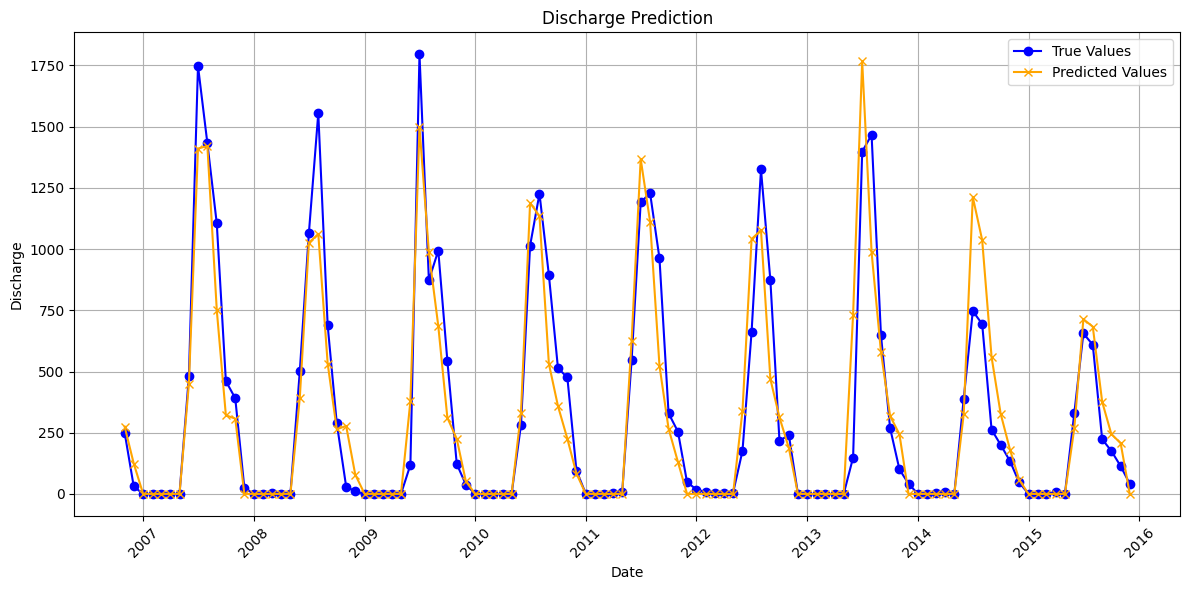

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform y_test and predictions to get actual discharge values
y_test_actual = scaler_streamflow.inverse_transform(y_test.reshape(-1, 1))
predictions_actual = scaler_streamflow.inverse_transform(predictions.reshape(-1, 1))

# Convert date_test to a proper format if necessary
date_test = pd.to_datetime(date_test)

# Plot the actual and predicted values with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot( date_test,y_test_actual, label='True Values', marker='o', color='blue')
plt.plot( date_test,predictions_actual, label='Predicted Values', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title('Discharge Prediction')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 388 (1.52 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 195 (784.00 B)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_actual, predictions_actual)

# Calculate MSE
mse = mean_squared_error(y_test_actual, predictions_actual)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate NSE
numerator = np.sum((y_test_actual - predictions_actual) ** 2)
denominator = np.sum((y_test_actual - np.mean(y_test_actual)) ** 2)
nse = 1 - numerator / denominator

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"NSE: {nse}")


MAE: 97.8171275849557
MSE: 28328.312860555136
RMSE: 168.3101686189968
NSE: 0.865912631032854
